# 소개
- 영상 처리 또는 영상 인식 소스들을 모아 놓은 라이브러리
- 약 2,500개의 영상 처리 알고리즘이 최적화 되어 있어, 활용에 집중할 수 있도록 함
- 알고리즘에 대한 기초적인 이해가 있으면, 커스터마이징도 가능 함

# 설치

In [4]:
# pip 명령 사용
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# 설치 후 OpenCV 버전 확인
import cv2
cv2.__version__

'4.6.0'

# 이미지 읽기 (cv2.imread)
### OpenCV로 읽기 가능한 이미지 포맷
- Windows bitmaps - *.bmp, *.dib
- JPEG files - *.jpeg, *.jpg, *.jpe
- JPEG 2000 files - *.jp2
- Portable Network Graphics - *.png
- WebP - *.webp
- Portable image format - *.pbm, *.pgm, *.ppm *.pxm, *.pnm
- Sun rasters - *.sr, *.ras
- TIFF files - *.tiff, *.tif
- OpenEXR Image files - *.exr
- Radiance HDR - *.hdr, *.pic

### flags : 이미지 파일을 읽을 때의 옵션
- -1 : 원본 (Unchanged) = cv2.IMREAD_UNCHANGED
- 0  : 단일 채널 (Grayscale) = cv2.IMREAD_GRAYSCALE
- 1  : 3 채널 (BGR color) = cv2.IMREAD_COLOR
- 2  : 16-bit는 16-bit로, 32-bit는 32-bit로, 그 외에는 8-bit
- 16 : 단일 채널 (Grayscale) & 이미지 크기 1/2으로 축소
- 17 : 3 채널 (BGR color) & 이미지 크기 1/2으로 축소
- 32 : 단일 채널 (Grayscale) & 이미지 크기 1/4으로 축소
- 33 : 3 채널 (BGR color) & 이미지 크기 1/4으로 축소
- 64 : 단일 채널 (Grayscale) & 이미지 크기 1/8으로 축소
- 65 : 3 채널 (BGR color) & 이미지 크기 1/8으로 축소

In [34]:
# 이미지 파일 경로
img_dir = 'D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg'
fname = 'hamburg_000000_000042_leftImg8bit.png'

import os
img_gray         = cv2.imread(os.path.join(img_dir, fname), flags =  0)
img_color        = cv2.imread(os.path.join(img_dir, fname), flags =  1)
img_color_reduce = cv2.imread(os.path.join(img_dir, fname), flags = 17)

### imread 결과
- 이미지 높이(h), 너비(w), 채널(c) 순서로 배열 출력

In [36]:
print(0, img_gray.shape) # Gray
print(1, img_color.shape) # BGR
print(17, img_color_reduce.shape) # BGR, Half size

0 (1024, 2048)
1 (1024, 2048, 3)
17 (512, 1024, 3)


### 변환 : BGR -> RGB

In [37]:
# BRG -> RGB로 변경
img_color        = cv2.cvtColor(img_color       , cv2.COLOR_BGR2RGB)
img_color_reduce = cv2.cvtColor(img_color_reduce, cv2.COLOR_BGR2RGB)

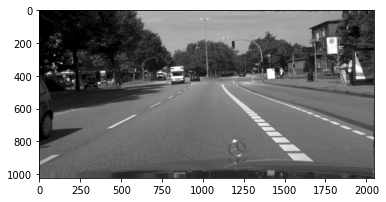

In [38]:
# Grayscale
plt.imshow(img_gray, cmap = 'gray'); plt.show()

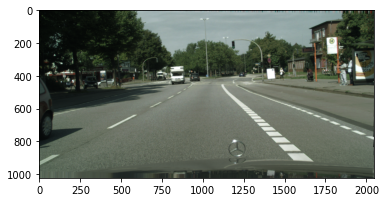

In [39]:
# RGB
plt.imshow(img_color); plt.show()

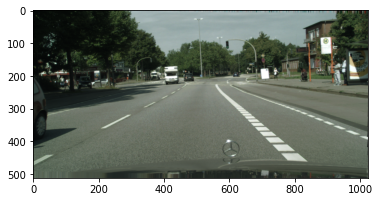

In [40]:
# RGB & Half size
plt.imshow(img_color_reduce); plt.show()

# 두 개의 이미지 더하기 (cv2.add, cv2.addWeighted)

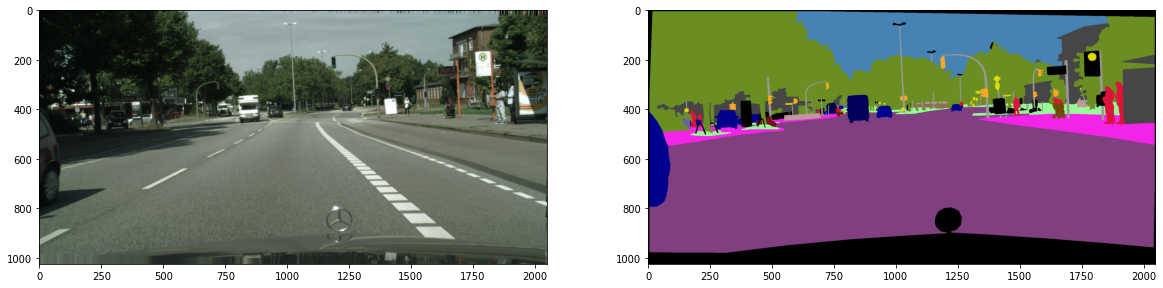

In [3]:
# 이미지 읽기
base_img = cv2.imread(
    "D:/leftImg8bit_trainvaltest/leftImg8bit/train/hamburg/hamburg_000000_000042_leftImg8bit.png",
    flags = 1
)
seg_img = cv2.imread(
    "D:/gtFine_trainvaltest/gtFine/train/hamburg/hamburg_000000_000042_gtFine_color.png",
    flags = 1
)

# 이미지 변환
base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)
seg_img  = cv2.cvtColor( seg_img, cv2.COLOR_BGR2RGB)

# 시각화
import matplotlib.pyplot as plt
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, seg_img]): sub.imshow(img)
plt.show()

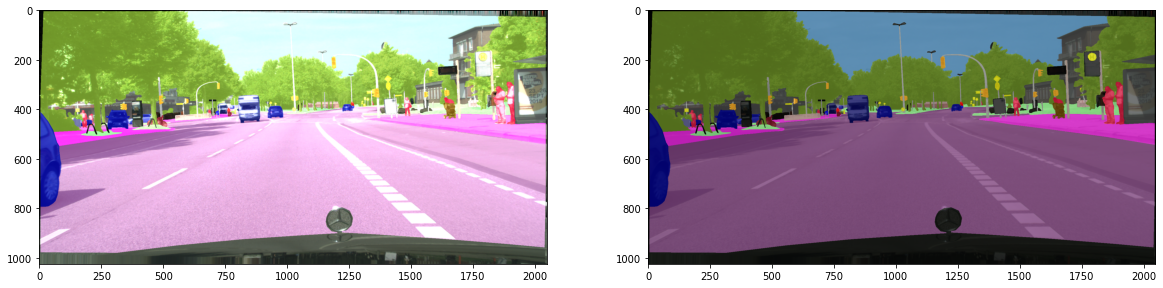

In [4]:
# 이미지 더하기
added_img    = cv2.add(base_img, seg_img)
weighted_img = cv2.addWeighted(base_img, .25, seg_img, .75, gamma = 0) # gamma : 가중합 결과에 추가적으로 더하는 값

# 시각화
fig, subs = plt.subplots(ncols = 2, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [added_img, weighted_img]): sub.imshow(img)
plt.show()

# 필터링
- 영상/이미지 처리 분야에서 광범위하게 사용 됨
- 딥러닝에서 합성곱 신경망의 기본 연산은 필터링 개념을 적용한 것
### 블러링 (cv2.blur)
- 평균 필터를 기반으로 이미지를 부드럽게 만드는 기법
- 잡음(노이즈) 제거의 전처리 용도로 사용 됨
- cv2.blur(src, ksize, borderType = 'BORDER_REFLECT_101')
  - src : 입력 이미지
  - ksize : 필터의 크기
  - borderType : 이미지 가장자리를 처리하는 방식
    - BORDER_REFLECT_101 (default) : 대칭 방향의 인접한 픽셀값을 가져 옴
    - BORDER_REPLICATE : 가장 가까운 픽셀의 값으로 채움
    - BORDER_WARP : 가장 멀리 있는 대칭 픽셀값을 가져 옴
    - BORDER_CONSTANT : 주어진 특정 값(default 0)으로 채움

<center>

![](./bordertype.png)

</center>

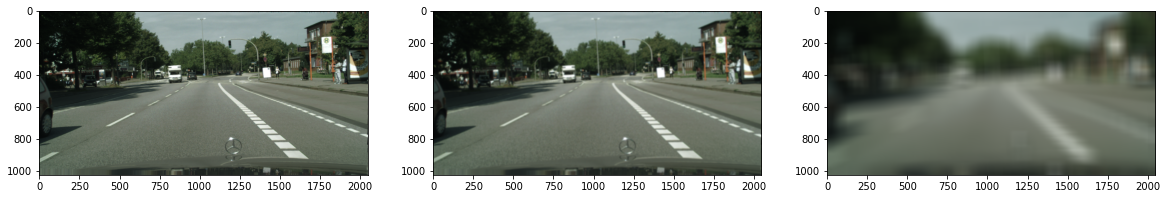

In [10]:
blur9_img  = cv2.blur(base_img, (9, 9))
blur99_img = cv2.blur(base_img, (99, 99))

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, blur9_img, blur99_img]): sub.imshow(img)
plt.show()

### 가우시안 블러링 (cv2.GaussianBlur)
- 앞의 예제는 필터가 모든 픽셀에 동일한 가중치를 적용한 것
- 이 외에 가우시안 필터를 적용하는 방안이 더 많이 사용 됨
- cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType = 'BORDER_REFLECT_101')
  - sigmaX : 가로축의 표준편차 (0이면 필터 사이즈 ksize에 의해 자동으로 결정 됨)
  - sigmaY : 세로축의 표준편차
- 아래의 수식처럼 평균과 분산으로 분포를 표현 함

<center>

$f\left(x|\mu,\sigma\right)=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)$

</center>

- 평균 : 필터의 중앙, 분산 : 주변 픽셀의 기여도
- 가우시안 분포의 값 : 필터의 각 위치(중앙으로부터 거리)에 사용되는 가중치
- 분산이 작을수록 필터 중앙에 위치한 픽셀값의 영향이 커지고,
- 분산이 커질수록 필터 주변에 위치한 픽셀값들의 영향이 커지는 형태

<center>

![](./Normal_Distribution_PDF.svg)

</center>

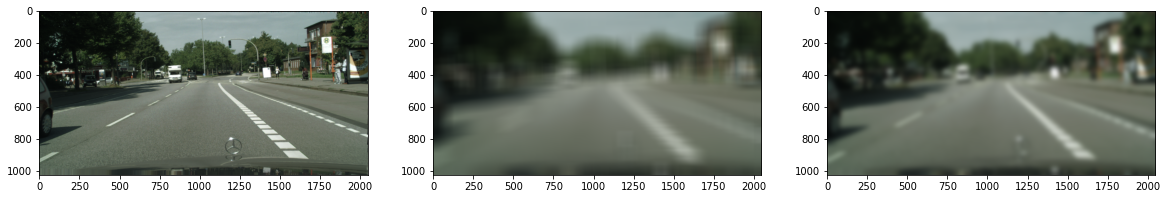

In [12]:
blur99_img = cv2.blur(base_img, (99, 99))
gblur_img  = cv2.GaussianBlur(base_img, (99, 99), sigmaX = 0, sigmaY = 0)

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, blur99_img, gblur_img]): sub.imshow(img)
plt.show()

# blur보다 물체의 윤곽이 잘 유지되면서 부드러워짐

### 샤프닝
- 블러링과는 반대로 이미지를 선명하게 만드는 기법
- 주변 픽셀과의 차이를 크게 하여 윤곽을 명확하게 함
- 대표적으로 **언샤프(Unsharp)** 기법이 있음
  - 원본 이미지와 블러링 된 이미지 간의 차이를 이용 함
  - 윤곽 : 주변 픽셀과 값 차이가 큼 -> 블러링 된 픽셀값(주변 픽셀과 평균)이 원래 픽셀값과 차이가 큼

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


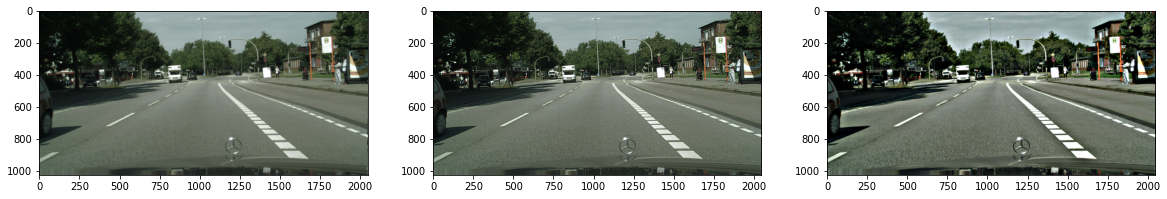

In [28]:
import numpy as np

unsharp9_img  = cv2.subtract(base_img.astype(np.uint16) * 2, blur9_img.astype(np.uint16))
unsharp99_img = cv2.subtract(base_img.astype(np.uint16) * 2, blur99_img.astype(np.uint16))

# 시각화
fig, subs = plt.subplots(ncols = 3, figsize = (20, 5))
for sub, img in zip(subs.flatten(), [base_img, unsharp9_img, unsharp99_img]): sub.imshow(img)
plt.show()